## Librairies utilisées

In [87]:
#Code
# What we want is a function taking an image as it's input, and returning a 3 dimensional diagram.
# Details of the diagram :
# The diagram represents the points of the image in 3D space, where the x,y,z coordinates are the RGB values of the pixel.
# A 4th dimension is the number of point having the same RGB values. This is represented by the size of the point.

# The function should take as input an image, and return a 3D diagram.
# The diagram should be interactive, and allow the user to see the number of points having the same RGB values when hovering over a point.


# When importing an image, we need to get all pixels, and their RGB values.
# Then, we need to count the number of points having the same RGB values.
# Finally, we need to plot the points in 3D space, with the size of the point representing the number of points having the same RGB values.

# We will use the following libraries :
# - numpy : for array manipulation
# - matplotlib : for plotting
# - PIL : for image manipulation
# - ipywidgets : for interactivity
# - plotly : for 3D plotting
# - plotly.express : for 3D plotting

# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import plotly.graph_objects as go





### 1. Récupération de l'image

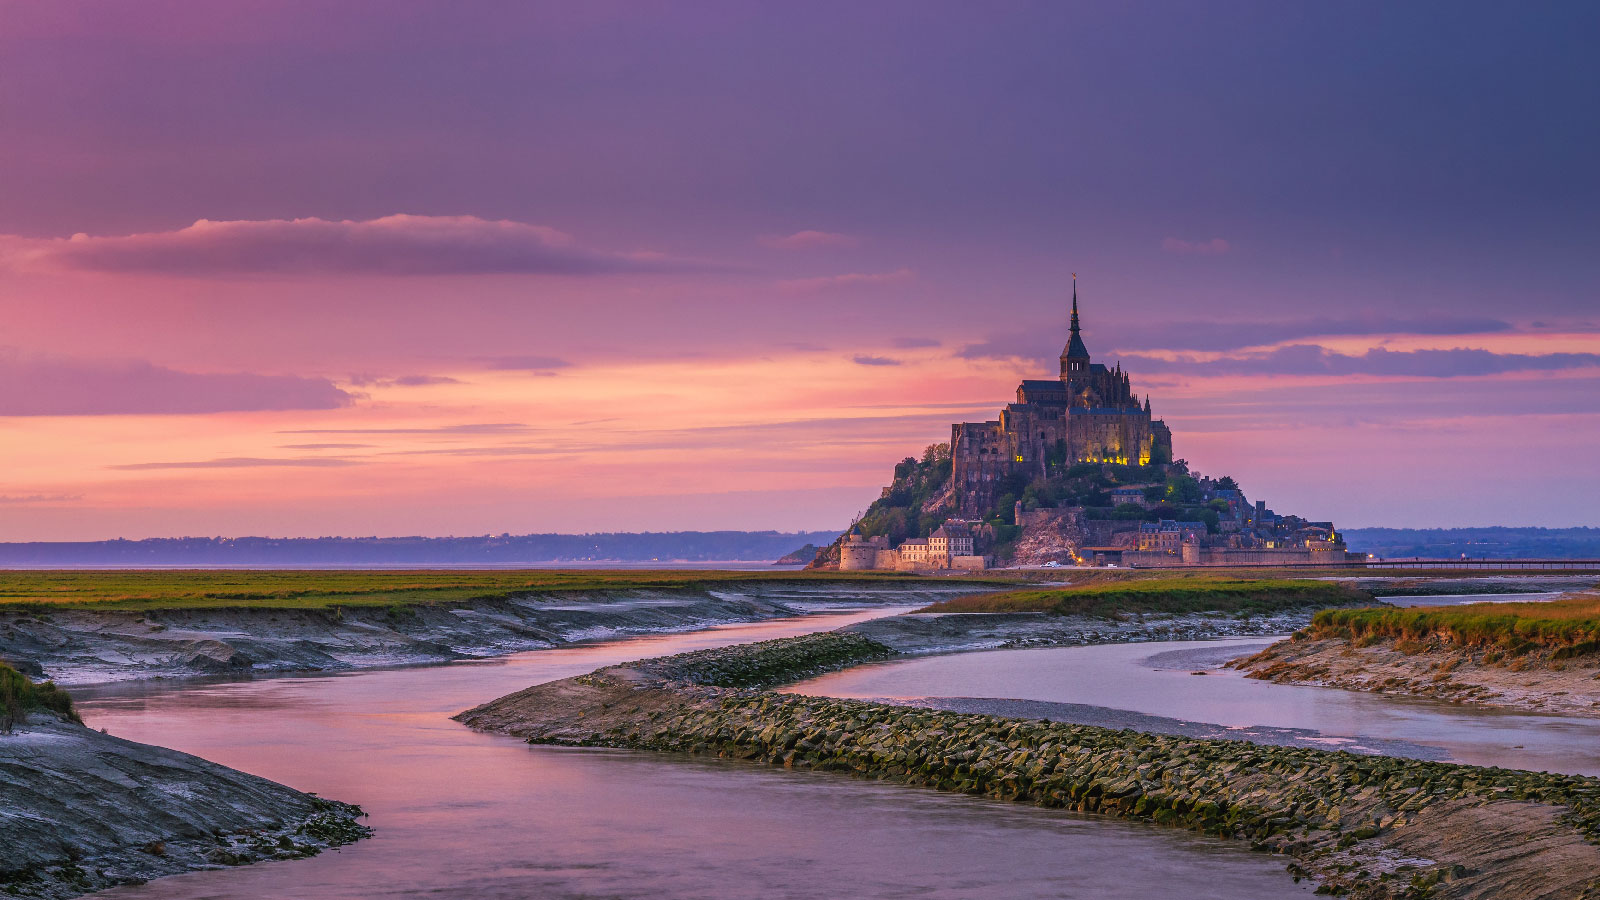

In [88]:
# This function takes a path as an imput and returns an image
def get_image(path):
    return Image.open(path)

img = get_image('st_michel.jpg')

# For debug.
display(img)

### 2. Récupération des pixels de l'image et de leur valeur RGB

array([[[158,  97, 141],
        [158,  97, 141],
        [158,  97, 141],
        ...,
        [ 55,  71, 122],
        [ 55,  71, 122],
        [ 55,  71, 122]],

       [[158,  97, 141],
        [158,  97, 141],
        [158,  97, 141],
        ...,
        [ 55,  71, 122],
        [ 55,  71, 122],
        [ 55,  71, 122]],

       [[158,  97, 141],
        [158,  97, 141],
        [157,  96, 140],
        ...,
        [ 55,  71, 122],
        [ 55,  71, 122],
        [ 55,  71, 122]],

       ...,

       [[100, 105, 125],
        [ 82,  87, 107],
        [ 90,  92, 113],
        ...,
        [ 82,  64,  52],
        [ 81,  61,  50],
        [ 60,  40,  29]],

       [[ 59,  64,  84],
        [ 51,  56,  76],
        [ 48,  50,  71],
        ...,
        [ 78,  62,  49],
        [ 83,  69,  56],
        [ 73,  59,  46]],

       [[ 55,  60,  80],
        [ 65,  70,  90],
        [ 63,  65,  86],
        ...,
        [ 87,  75,  61],
        [ 89,  77,  63],
        [ 53,  44,  29]]

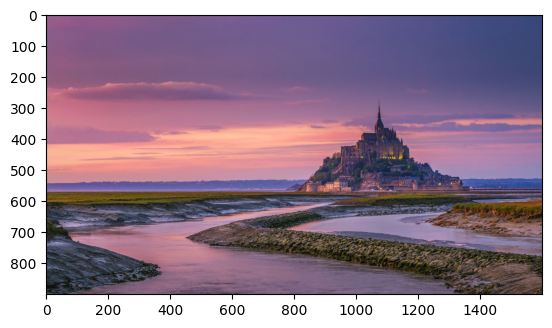

In [89]:
# In this part, we make a function taking an image as an input, and returning a 2D array with the RGB values of each pixel.
# We use the numpy library for array manipulation.

# This function takes an image as an input, and returns a 2D array with the RGB values of each pixel.
def get_pixels(image):
    return np.array(image)

pixels = get_pixels(img)
display(pixels)

# As a verification, we can plot the pixels using matplotlib.
plt.imshow(pixels)



### 3. Triage des pixels

In [90]:
# In this part we make a function that takes the array of RGB values as an input, and returns a dataFrame with the RGB values and the number of points having that RGB value.

# This function takes an array of RGB values as an input, and returns a dataFrame with the RGB values and the number of points having that RGB value.
# The first 3 values are the RGB values, and the 4th value is the number of points having that RGB value.
def get_rgb_count_as_df(pixels):
    # We flatten the array of pixels, and then get the unique values and their count.
    unique, counts = np.unique(pixels.reshape(-1, pixels.shape[-1]), axis=0, return_counts=True)
    # We create a dataFrame with the unique values and their count.
    df = pd.DataFrame(data=unique, columns=['R', 'G', 'B'])
    df['count'] = counts
    return df

df_rgb_count = get_rgb_count_as_df(pixels)
display(df_rgb_count)


    

,R,G,B,count
0,0,0,0,1
1,0,0,2,2
2,0,1,0,8
3,0,1,4,1
4,0,2,0,5
...,...,...,...,...
160718,255,249,172,1
160719,255,252,114,1
160720,255,252,185,1
160721,255,252,229,1


### 4. Création du diagramme non-interactif

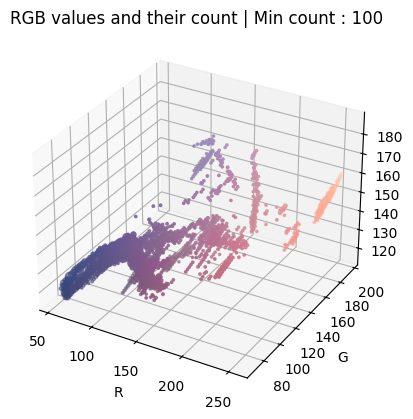

In [100]:
# Input of the function : dataFrame with the RGB values and the number of points having that RGB value.

# Output : 3D diagram with the RGB values as x,y,z coordinates, and the number of points having that RGB value as the size of the point.

# This function takes a dataFrame with the RGB values and the number of points having that RGB value as an input, and returns a 3D diagram with the RGB values as x,y,z coordinates, and the number of points having that RGB value as the size of the point.
# The color of the point is the RGB value.

# We define a minimum and maximum size for the points.
min_size = 1
max_size = 50

# We define a function that scales the size of the points. 
def scale_size(size):
    # We scale the size of the points between the minimum and maximum size.
    return (size - df_rgb_count['count'].min()) / (df_rgb_count['count'].max() - df_rgb_count['count'].min()) * (max_size - min_size) + min_size

# We also define a minimum count for the points.
min_count = 100

# New dataframe name df_test with a column for the size of the points.
df_test = df_rgb_count.copy()
df_test['size'] = df_test['count'].apply(scale_size)


def plot_rgb_count(df):
    # We create a figure with 3D axes.
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    # We plot the RGB values and their count.

    # We only plot the points with a count greater than the minimum count.
    df_filtered = df.copy()
    df_filtered = df[df['count'] > min_count]
    # We plot the points.
    ax.scatter(df_filtered['R'], df_filtered['G'], df_filtered['B'], s=df_filtered['size'], c=df_filtered[['R', 'G', 'B']] / 255)
    # We set the labels.
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    # We set the title.
    ax.set_title('RGB values and their count | Min count : ' + str(min_count))
    # We show the plot.
    plt.show()

plot_rgb_count(df_test)








### 5. Création d'un diagramme interactif

In [99]:
# We would like to create an interactive 3D diagram with the RGB values as x,y,z coordinates, and the number of points having that RGB value as the size of the point.

# Input of the function : dataFrame with the RGB values and the number of points having that RGB value.
# Output : 3D diagram with the RGB values as x,y,z coordinates, and the number of points having that RGB value as the size of the point.


min_count_observable = 100
# We have defined a minimum count of 30 for a point to be observable.
# This is because we want to avoid having too many points on the diagram, which would make it unreadable.

def plot_rgb_count_interactive(df):
    # We filter the dataFrame to only keep the points with a count greater than the minimum count.
    df_filtered = df.copy()
    df_filtered = df[(df['count'] > min_count_observable)]


    # We create a figure with 3D axes.
    trace = go.Scatter3d(
        x=df_filtered['R'],
        y=df_filtered['G'],
        z=df_filtered['B'],
        
        mode='markers',
        hoverinfo= "text",
        hovertext=" Nb of points : " + df_filtered['count'].astype(str) + "<br> R : " + df_filtered['R'].astype(str) + "<br> G : " + df_filtered['G'].astype(str) + "<br> B : " + df_filtered['B'].astype(str) + "<br>",
        marker=dict(
            size=df_filtered['size'],
            color=df_filtered[['R', 'G', 'B']] / 255,
            opacity=0.8,
            line=dict(
                width=0.5,
                color=df_filtered[['R', 'G', 'B']] / 255,
            ),
        ),
    )

    data = [trace]
    layout = go.Layout(
        autosize=False,
        scene= dict(
            xaxis=dict(
                title='R'
            ),
            yaxis=dict(
                title='G'
            ),
            zaxis=dict(
                title='B'
            ),
        ),
        margin=dict(l=0, r=0, b=0, t=40),
        title='RGB values and their count | Min count : ' + str(min_count_observable),
        )

    fig=go.Figure(data=data, layout=layout)
    fig.show()

plot_rgb_count_interactive(df_test)
